# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [140]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [141]:
df = pd.read_csv("craftcans.csv")
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


## How many rows do you have in the data? What are the column types?

In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [143]:
df.Brewery.value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [144]:
df.ABV.value_counts().head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [145]:
df.ABV.str.replace("%", "")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [146]:
df.ABV.str.replace("%", "")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [147]:
df.ABV.str.replace("%", "").astype(float)
df['ABV'] = df.ABV.str.replace("%", "").astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [148]:
import statistics

In [149]:
df.ABV.mean(numeric_only=True)

5.977342419080068

<Axes: >

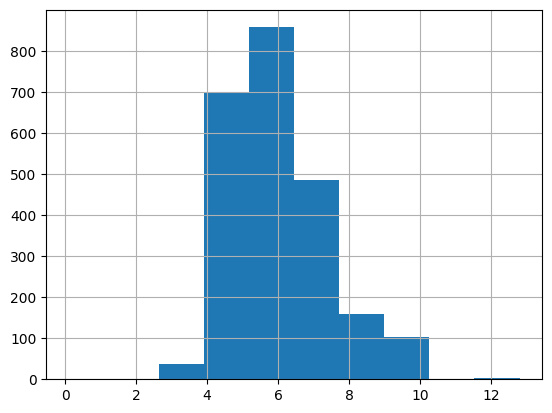

In [150]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [151]:
df.ABV.isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [152]:
df.Location.value_counts()

Location
Grand Rapids, MI     66
Chicago, IL          55
Portland, OR         52
Indianapolis, IN     43
San Diego, CA        42
                     ..
Loveland, CO          1
Worcester, MA         1
Boynton Beach, FL     1
Lombard, IL           1
Pineland, ME          1
Name: count, Length: 401, dtype: int64

## List all of the beer from Brooklyn, NY

In [153]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   float64
 6   IBUs      2410 non-null   object 
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


In [155]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts()

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [156]:
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)


Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [157]:
df[df.Location.str.contains("NY$", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [158]:
df[df.Location.str.contains("NY$", na=False)].Brewery.value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [159]:
df[df.Style.str.contains("IPA$", na=False)].Style.value_counts()

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
American White IPA                 11
Name: count, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [160]:
df['IBUs'] = df.IBUs.str.replace("Does not apply", "NaN").astype(float)
df.dtypes

#df.ABV.str.replace("%", "").astype(float)
#df['ABV'] = df.ABV.str.replace("%", "").astype(float)
#df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [161]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<Axes: >

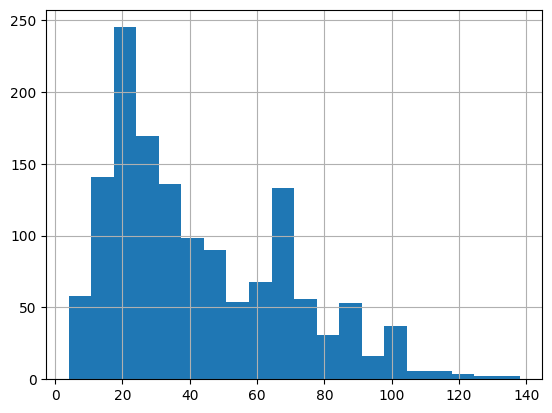

In [162]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [176]:
df.IBUs.sum()
df.IBUs.value_counts()
df.IBUs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2416 entries, 0 to 2415
Series name: IBUs
Non-Null Count  Dtype  
--------------  -----  
1405 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [175]:
import numpy as np
np.nanpercentile(df.IBUs, 75)

64.0

In [179]:
df[df.IBUs > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [180]:
np.nanpercentile(df.IBUs, 25)

21.0

In [181]:
df[df.IBUs < 25]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
...,...,...,...,...,...,...,...
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2395,Dunkel Lager,Sly Fox Brewing Company,"Pottstown, PA",Munich Dunkel Lager,12 oz.,5.3,21.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [182]:
df.groupby('Style')['IBUs'].median()

Style
Abbey Single Ale              22.0
Altbier                       36.5
American Adjunct Lager         9.0
American Amber / Red Ale      31.0
American Amber / Red Lager    23.0
                              ... 
Tripel                        27.5
Vienna Lager                  23.5
Wheat Ale                     24.0
Winter Warmer                 22.0
Witbier                       15.5
Name: IBUs, Length: 99, dtype: float64

In [ ]:
df.sort_values()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [218]:
#df.groupby('Style')[df.IBUs < 25].sort_values(ascending=False)

#df.groupby('Style')['IBUs'].value_counts().sort_values(ascending=False).head()

df[df.IBUs < 25].groupby('Style')['IBUs'].value_counts().sort_values(ascending=False).head()

Style                     IBUs
American Pale Wheat Ale   20.0    15
American Blonde Ale       20.0    11
American Amber / Red Ale  24.0     8
American Adjunct Lager    9.0      7
Saison / Farmhouse Ale    20.0     7
Name: count, dtype: int64

In [219]:
df[df.IBUs > 75].groupby('Style')['IBUs'].value_counts().sort_values(ascending=False).head()

Style                           IBUs 
American Double / Imperial IPA  85.0     13
American IPA                    80.0     11
American Double / Imperial IPA  100.0    11
American IPA                    100.0    10
                                85.0      9
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [236]:
#df[df.Style == 'Witbier', 'Hefeweizen', 'American Pale Wheat Ale']

wheat_beer = df.Style.str.contains("Witbier|Hefeweizen|American Pale Wheat Ale", na=False)
df[wheat_beer].IBUs.mean()

#df.IBUs.hist(bins=20)
#df[df.Style.str.contains("IPA$", na=False)].Style.value_counts()


18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

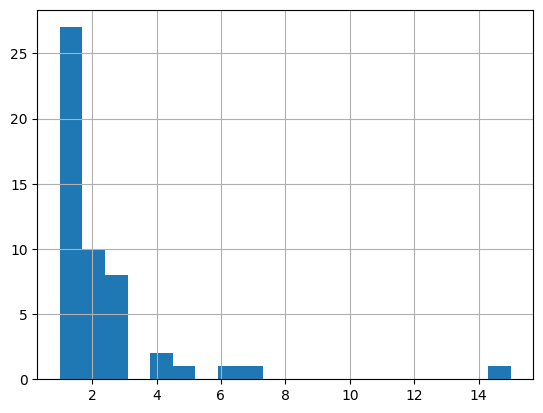

In [243]:
df[wheat_beer].groupby('Style')['IBUs'].value_counts().hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [245]:
#wheat_beer = df.Style.str.contains("Witbier|Hefeweizen|American Pale Wheat Ale", na=False)
#df[wheat_beer].IBUs.mean()

ipa = df.Style.str.contains("IPA$", na=False)
df[ipa].IBUs.mean()


72.26233766233766

<Axes: >

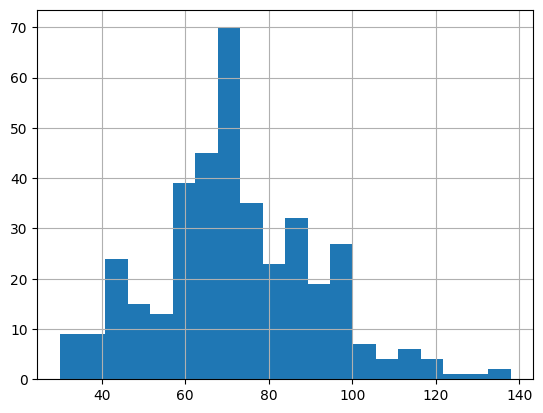

In [246]:
df[ipa].IBUs.hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

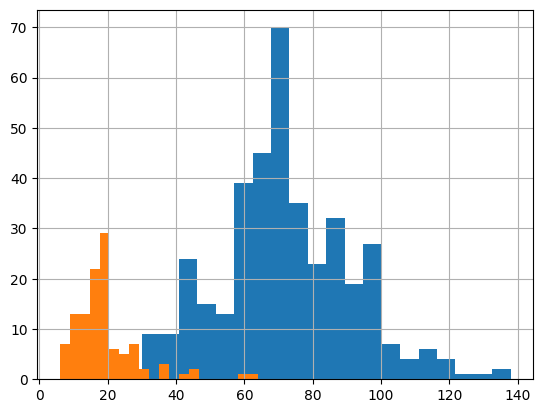

In [247]:
df[ipa].IBUs.hist(bins=20)
df[wheat_beer].IBUs.hist(bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [248]:
ipa = df.Style.str.contains("IPA$", na=False)
df[ipa].ABV.mean()


6.8934306569343065

In [250]:
wheat_beer = df.Style.str.contains("Witbier|Hefeweizen|American Pale Wheat Ale", na=False)
df[wheat_beer].ABV.mean()

5.043715846994536

<Axes: >

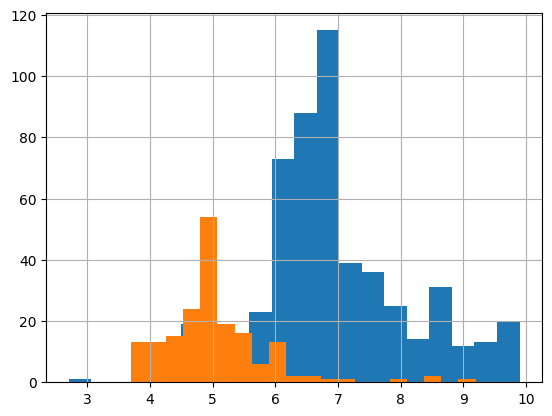

In [251]:
df[ipa].ABV.hist(bins=20)
df[wheat_beer].ABV.hist(bins=20)

## Good work!